# TIMIT
语音语料库，数据是文本形式
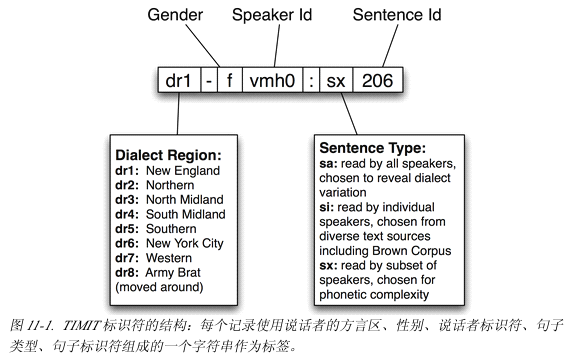

In [1]:
import nltk

In [4]:
phonetic = nltk.corpus.timit.phones('dr1-fvmh0/sa1')
phonetic

['h#',
 'sh',
 'iy',
 'hv',
 'ae',
 'dcl',
 'y',
 'ix',
 'dcl',
 'd',
 'aa',
 'kcl',
 's',
 'ux',
 'tcl',
 'en',
 'gcl',
 'g',
 'r',
 'iy',
 's',
 'iy',
 'w',
 'aa',
 'sh',
 'epi',
 'w',
 'aa',
 'dx',
 'ax',
 'q',
 'ao',
 'l',
 'y',
 'ih',
 'ax',
 'h#']

In [6]:
nltk.corpus.timit.word_times('dr1-fvmh0/sa1')

[('she', 7812, 10610),
 ('had', 10610, 14496),
 ('your', 14496, 15791),
 ('dark', 15791, 20720),
 ('suit', 20720, 25647),
 ('in', 25647, 26906),
 ('greasy', 26906, 32668),
 ('wash', 32668, 37890),
 ('water', 38531, 42417),
 ('all', 43091, 46052),
 ('year', 46052, 50522)]

In [29]:
timitdict = nltk.corpus.timit.transcription_dict()
timitdict['greasy']

['g', 'r', 'iy1', 's', 'iy']

In [34]:
nltk.corpus.timit.spkrinfo('dr1-fvmh0')

SpeakerInfo(id='VMH0', sex='F', dr='1', use='TRN', recdate='03/11/86', birthdate='01/08/60', ht='5\'05"', race='WHT', edu='BS', comments='BEST NEW ENGLAND ACCENT SO FAR')

# 语料库

In [39]:
s1 = '01010101'
s2 = '00001111'
s3 = '00001110'

# 在指定窗口大小下计算两个字符串的差异大小
nltk.windowdiff(s1, s2, 3)

0.6666666666666666

In [40]:
nltk.windowdiff(s2, s3, 3)

0.16666666666666666

# 使用XML

In [42]:
merchant_file = nltk.data.find('corpora/shakespeare/merchant.xml')
raw = open(merchant_file).read()
print(raw[0: 168])

<?xml version="1.0"?>
<?xml-stylesheet type="text/css" href="shakes.css"?>
<!-- <!DOCTYPE PLAY SYSTEM "play.dtd"> -->

<PLAY>
<TITLE>The Merchant of Venice</TITLE>

<!-


In [50]:
from xml.etree import ElementTree

In [56]:
merchant = ElementTree.parse(merchant_file)
merchant

In [62]:
speaker_seq = [s.text for s in merchant.findall('ACT/SCENE/SPEECH/SPEAKER')]
speaker_freq = nltk.FreqDist(speaker_seq)
top5 = list(speaker_freq.keys())[:5]
top5

['ANTONIO', 'SALARINO', 'SALANIO', 'BASSANIO', 'LORENZO']

# 使用Toolbox数据

In [63]:
from nltk.corpus import toolbox

In [64]:
lexicon = toolbox.xml('rotokas.dic')
# 1、索引访问
lexicon[3][0]

<Element 'lx' at 0x0000021D7CA6C220>

In [65]:
lexicon[3][0].tag

'lx'

In [66]:
lexicon[3][0].text

'kaa'

In [68]:
# 2、路径访问
[lexeme.text.lower() for lexeme in lexicon.findall('record/lx')][:10]

['kaa',
 'kaa',
 'kaa',
 'kaakaaro',
 'kaakaaviko',
 'kaakaavo',
 'kaakaoko',
 'kaakasi',
 'kaakau',
 'kaakauko']

In [78]:
# 格式化
html = '<table>\n'
for entry in lexicon[70: 80]:
    lx = entry.findtext('lx')
    ps = entry.findtext('ps')
    ge = entry.findtext('ge')
    html += '  <tr><td>%s</td><td>%s</td><td>%s</td></tr>\n' % (lx, ps, ge)
    
html += '</table>'
print(html)

<table>
  <tr><td>kakae</td><td>???</td><td>small</td></tr>
  <tr><td>kakae</td><td>CLASS</td><td>child</td></tr>
  <tr><td>kakaevira</td><td>ADV</td><td>small-like</td></tr>
  <tr><td>kakapikoa</td><td>???</td><td>small</td></tr>
  <tr><td>kakapikoto</td><td>N</td><td>newborn baby</td></tr>
  <tr><td>kakapu</td><td>V</td><td>place in sling for purpose of carrying</td></tr>
  <tr><td>kakapua</td><td>N</td><td>sling for lifting</td></tr>
  <tr><td>kakara</td><td>N</td><td>arm band</td></tr>
  <tr><td>Kakarapaia</td><td>N</td><td>village name</td></tr>
  <tr><td>kakarau</td><td>N</td><td>frog</td></tr>
</table>


In [79]:
# 为每个条目计算字段的平均个数
from nltk.corpus import toolbox

lexicon = toolbox.xml('rotokas.dic')
sum(len(entry) for entry in lexicon) / len(lexicon)

13.635955056179775

# 使用OLAC元数据
元数据：关于数据的结构化数据

OLAC：开放语言档案社区